In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [3]:
import warnings

warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("C:/Users/amalv/OneDrive/Desktop/alliance/ml/decision tree/car_evaluation.csv")

In [5]:
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [6]:
df.dtypes

vhigh      object
vhigh.1    object
2          object
2.1        object
small      object
low        object
unacc      object
dtype: object

In [7]:
df.shape

(1727, 7)

In [8]:
col_names = ['buying', 'maint', 'doors', 'person', 'lug_boot', 'safety', 'class']
df.columns = col_names

In [9]:
df

,buying,maint,doors,person,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [10]:
df.describe()


,buying,maint,doors,person,lug_boot,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   person    1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [12]:
for col in col_names:
    print(df[col].value_counts())

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: person, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


We can see that the doors and persons are categorical in nature. So, I will treat them as categorical variables.

In [13]:
# for col in df.columns:
#     print(df[col].value_counts())

## Summary of variables
There are 7 variables in the dataset. All the variables are of categorical data type.


These are given by buying, maint, doors, persons, lug_boot, safety and class.


class is the target variable.

In [14]:
df

,buying,maint,doors,person,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [15]:
df['class'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [16]:
df['class'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [17]:
df.isnull().sum()

buying      0
maint       0
doors       0
person      0
lug_boot    0
safety      0
class       0
dtype: int64

no null values

# decision feature vector and target varible

In [18]:
X = df.drop(['class'], axis=1)

y = df['class']

In [19]:
X

,buying,maint,doors,person,lug_boot,safety
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high
...,...,...,...,...,...,...
1722,low,low,5more,more,med,med
1723,low,low,5more,more,med,high
1724,low,low,5more,more,big,low
1725,low,low,5more,more,big,med


In [20]:
y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1722     good
1723    vgood
1724    unacc
1725     good
1726    vgood
Name: class, Length: 1727, dtype: object

# split data into training and testing

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=43)


In [22]:
x_train.shape, x_test.shape

((1157, 6), (570, 6))

In [23]:
df.shape

(1727, 7)

In [24]:
1157+570

1727

In [25]:
y_train.shape, y_test.shape

((1157,), (570,))

In [26]:
x_train.dtypes

buying      object
maint       object
doors       object
person      object
lug_boot    object
safety      object
dtype: object

In [27]:
x_train.head()

,buying,maint,doors,person,lug_boot,safety
429,vhigh,low,5more,more,big,med
375,vhigh,low,3,more,big,med
1712,low,low,5more,4,med,low
85,vhigh,vhigh,5more,2,med,high
1615,low,med,5more,more,med,high


all the variable are like ordinal so and non numeric so lets encode them 

In [28]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [29]:
import category_encoders as ce

In [30]:
df.columns

Index(['buying', 'maint', 'doors', 'person', 'lug_boot', 'safety', 'class'], dtype='object')

In [31]:
# encoding varible with Ordinal encoder
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'person', 'lug_boot', 'safety'])

x_train = encoder.fit_transform(x_train)

x_test = encoder.transform(x_test)

In [32]:
x_train.head()   #successfully converted

,buying,maint,doors,person,lug_boot,safety
429,1,1,1,1,1,1
375,1,1,2,1,1,1
1712,2,1,1,2,2,2
85,1,2,1,3,2,3
1615,2,3,1,1,2,3


In [33]:
x_test.head()

,buying,maint,doors,person,lug_boot,safety
1328,2,2,2,3,1,2
1663,2,1,2,2,1,3
840,4,1,1,3,2,1
614,4,4,4,1,2,2
1010,3,4,2,2,2,2


In [34]:
# now we have convert into numerical lets start with decision tree

In [35]:
#  importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [36]:
# inititiating decision tree with the creation of gini index 


gini_clf = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state=0)


# so here we select the type or criteria ti chech the quality of split ie gini (otheres are entropy, infogain)


# fit the model 
gini_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [37]:
print(gini_clf)

DecisionTreeClassifier(max_depth=3, random_state=0)


In [38]:
# predicting

In [39]:
y_pedi_gini = gini_clf.predict(x_test)

In [41]:
y_pedi_gini

array(['unacc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'acc', 'unacc',
       'acc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc',
       'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'acc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc',
       'acc', 'acc', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc',
       'acc', 'acc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc',
       'acc', 'acc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc',
       'unacc', 'unacc', 'acc', 'unacc', 'acc', 'acc', 'unacc', 'acc',
       'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 

In [40]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pedi_gini)))

Model accuracy score with criterion gini index: 0.7579


In [41]:
# print(f'Model accuracy score with criterion gini index: {(accuracy_score(y_test, y_pedi_gini)):.4f}')

In [42]:
# accuracy = (accuracy_score(y_test, y_pedi_gini))
# print(f'Model accuracy score with criterion gini index: {accuracy:.4f}')

In [43]:
y_pred_train_gini = gini_clf.predict(x_train)

y_pred_train_gini

array(['acc', 'acc', 'unacc', ..., 'unacc', 'acc', 'acc'], dtype=object)

In [44]:
accuracy_1 = accuracy_score(y_train, y_pred_train_gini)

print(f"training accuracy : {accuracy_1:.4f}")

training accuracy : 0.7908


In [45]:
# lets check overfiting

print(f'training score : {gini_clf.score(x_train,y_train):.4f}')

print(f"testing score : {gini_clf.score(x_test,y_test):.4f}")

training score : 0.7908
testing score : 0.7579


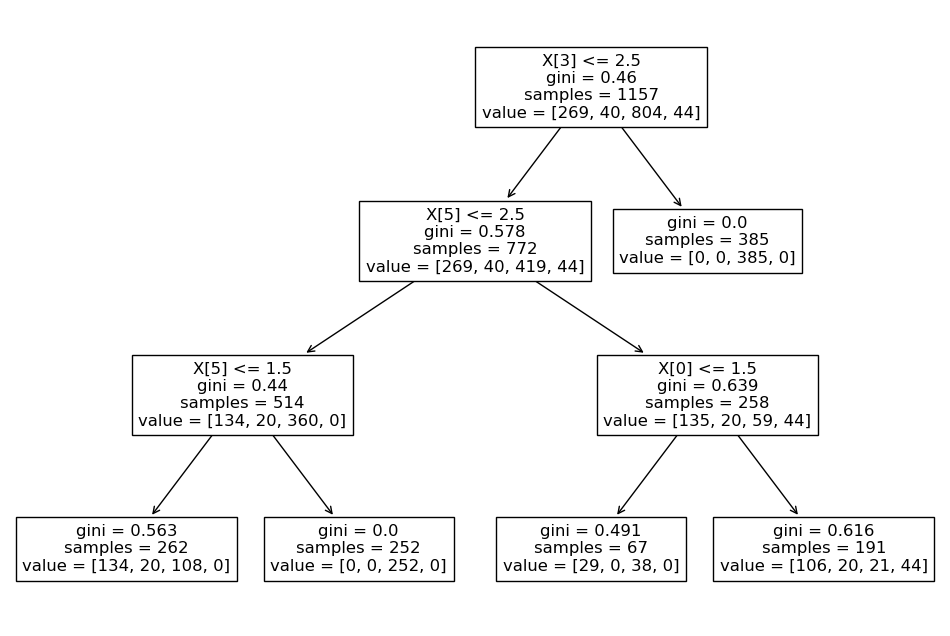

In [46]:
from sklearn import tree


plt.figure(figsize=(12,8))

tree.plot_tree(gini_clf.fit(x_train,y_train));

In [47]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


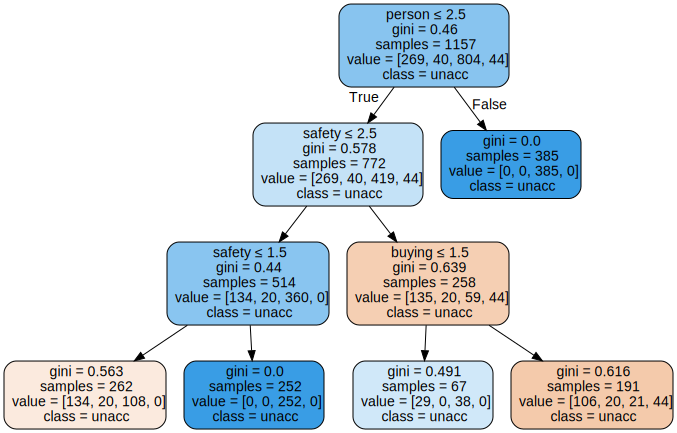

In [49]:
import graphviz 
dot_data = tree.export_graphviz(gini_clf, out_file=None, 
                              feature_names=x_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph

In [53]:
df['class'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [50]:
df

,buying,maint,doors,person,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


lets do this once again



lets take our data

In [55]:
df1 = pd.read_csv("C:/Users/amalv/OneDrive/Desktop/alliance/ml/decision tree/car_evaluation.csv")

In [56]:
df1 

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good
